# Solubility prediction for organic chemicals

Aqueous solubility is one of the key parameters defining a molecular drug activity.

In this notebook, we will develop models to predict the solubility of organic molecules in water based on their physiochemical
properties. 

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In this notebook we will work with the data that we cleaned in the 'solubility.ipynb' notebook.

Let's take a look at the data.

In [2]:
data=pd.read_csv('data_cleaned.csv')

In [3]:
data.head()

,Formula,name,Molecular weight,"Tmp, C",pK1,f(ui),logP,alpha,soluble,pK1_NA
0,CC(C)(C)CO,"NEOPENTYL ALCOHOL; 2,2-DIMETHYL-1-PROPANOL",88.150,56.0,-3.66,1.0,1.108,10.586,1,1
1,CN=C=S,METHYL ISOTHIOCYANATE,73.119,35.0,-3.66,1.0,1.013,8.352,1,1
2,C1OCOCO1,"1,3,5-TRIOXANE",90.079,64.0,-3.66,1.0,-0.446,7.416,1,1
3,CC(N)=O,ACETAMIDE,59.068,80.0,-3.66,1.0,-0.832,6.075,1,1
4,CC(O)CNCC(C)O,BIS(2-HYDROXYPROPYL)AMINE,133.191,44.5,8.97,1.0,-0.540,14.409,1,0


The cleaned data contains the following columns:
    
   **Formula**  contains a Simplified Molecular Input Line Entry System,” which is used to translate a
   chemical's three-    dimensional structure into a string of symbols;
   
   **name** is the IUPAC name of the compound;
   
   **Molecular wight** contains molecular weight of a molecule;
   
   **Tmp, C** is the temperature of the melting point of a substance;
   
   **logP** is the value of octanol–water partition coefficient;
   
   **f(ui)** - fraction un-ionized;
   
   **pK1** is the negative log_10 of corresponding constants of dissociation;
   
   **alpha** -molecular polarizability (the tendency of a molecule to aquire electric dipole moment when subjected to an electric field;
   
   **soluble** is the target variable wich equals 1 for soluble molecules and 0 for unsoluble molecules. This parameter was
   generated using the criterion of solubility according to which log(molar solubility) is greater than -5 for molecules
   soluble in water;
   
   **pK1_NA** is the parameter that we generated which is equals 1 for molecules that originally had NA in dissociacion   constant value, and it equals 0 when the molecule had a dissociation contant value.

## Solubility vs. physiochemical properties

In [4]:
data.soluble.value_counts()

1    1980
0     635
Name: soluble, dtype: int64

**Hypothesis statement**

We can make several hypothesis about the relationship between certain physiochemical qualities of a substance with
the substance solubility in water. For example:
    
1.There should be a relationship between the octanol-water partinioning coefficient (**P**) and the solubility of a substance.
  Because one can assume that the higher is the solubility in water, the higher fraction of a sabstance would be in water
  rather than in organic octanol. And the higher the fraction in octanol the lower should be the solubility in water.
  So the higher is the partitioning coefficient the lower is the solubility.
  
2.A volume-related term (molecular polarizability **alpha**) was experimentally found to have an essential negative contribution 
  to solubility. The lower polarizability the higher solubility in polar water.
 
3.Water is a polar solvent so one can assume that the higher unionized fraction **f(ui)** the lower solubility in polar 
   water   solvent

4.One can also assume that the higher **molecular weight** the lower solubility because it is more difficult for a large molecule
  to dissolve.

5.The higher dissociation constants (lower **pK1** values) the higher solubility. Also, missing value of dissociation 
contant (**pK1_NA**) can mean that they had not been measured because of insolubility of the molecules.
    

## Additional feature engineering

Physical and chemical properties of molecules are generally defined by their chemical structure.

In our dataframe, the column **Formula** contains information about the chemical structure of the molecules.
Hence, we can use the information about chemical structure to
engineer new features that can affect aqueous solubility of a molecule, based on general knowledge of Chemistry.

Let's try to do this.

### Charge

One can assume that charged molcules should have higher solubility in water since water is a polar sovent.
Charged molecules contain regions with positive charge and an equal amount of negatively charged regions in order to
resulting charge to be 0.

The number of charged and uncharged molecules:
0    2430
1     185
Name: charge, dtype: int64


<AxesSubplot:xlabel='charge'>

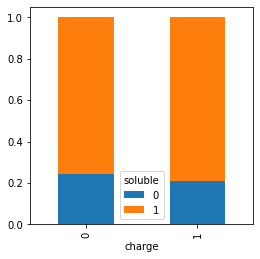

In [5]:
charge=[]

for i in range(2615):
    if data['Formula'][i].find('+')!=-1:
        charge.append(1)
    else:
        charge.append(0)
data['charge']=charge
print('The number of charged and uncharged molecules:')
print(data['charge'].value_counts())

charge=pd.crosstab(data['charge'],data['soluble'])
charge.div(charge.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(4,4))

From the barplot we can infer that the proportion of soluble molecules is only slightly higher within charged molecules
as compared to uncharged molecules.

### Long carbon chain

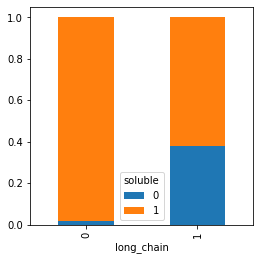

In [6]:
long_chain=[]
for i in range(2615):
    if data['Formula'][i].count('C')>10:
        long_chain.append(1)
    else:
        long_chain.append(0)
        
data['long_chain']=long_chain

long_chain=pd.crosstab(data['long_chain'],data['soluble'])
long_chain.div(long_chain.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(4,4))
plt.show()

We can infer that the proportion of soluble molecules is lower among molecules with molecules containing long carbon chains.

### Double bonds

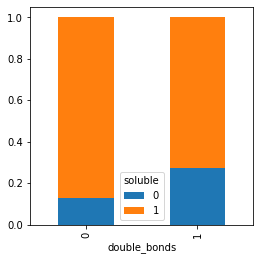

In [7]:
double_bonds=[]

for i in range(2615):
    if data['Formula'][i].count('=')>3:
        double_bonds.append(1)
    else:
        double_bonds.append(0)
        
data['double_bonds']=double_bonds

double_bonds=pd.crosstab(data['double_bonds'],data['soluble'])
double_bonds.div(double_bonds.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(4,4))
plt.show()

### Hydrogen bond acceptors

It has been seen that the presence of the hydrogen bond acceptors like (CO, O, F, Cl etc.) has a negative impact on the
substance solubility in water. Let us generate features that reflect the presence of different hydrogen bond acceptors 
in molecules.

### Chlorine

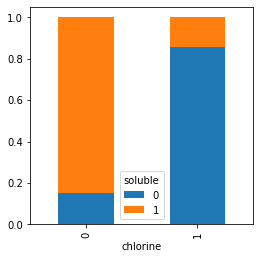

In [8]:
chlorine=[]

for i in range(2615):
    if data['Formula'][i].count('Cl')>2:
        chlorine.append(1)
    else:
        chlorine.append(0)
        
data['chlorine']=chlorine

chlorine=pd.crosstab(data['chlorine'],data['soluble'])
chlorine.div(chlorine.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(4,4))
plt.show()

### Fluorine

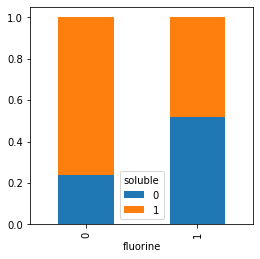

In [9]:
fluorine=[]

for i in range(2615):
    if data['Formula'][i].count('F')>2:
        fluorine.append(1)
    else:
        fluorine.append(0)
        
data['fluorine']=fluorine

fluorine=pd.crosstab(data['fluorine'],data['soluble'])
fluorine.div(fluorine.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(4,4))
plt.show()

### CO

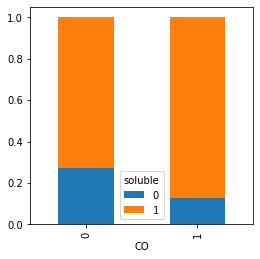

In [10]:
CO=[]

for i in range(2615):
    if data['Formula'][i].count('CO')>0:
        CO.append(1)
    else:
        CO.append(0)
        
data['CO']=CO

CO=pd.crosstab(data['CO'],data['soluble'])
CO.div(CO.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(4,4))
plt.show()

### NC

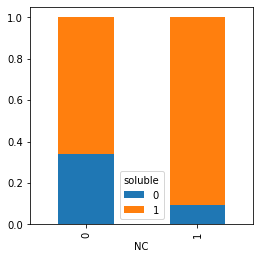

In [11]:
NC=[]

for i in range(2615):
    if data['Formula'][i].count('NC')>0:
        NC.append(1)
    else:
        NC.append(0)
        
data['NC']=NC

NC=pd.crosstab(data['NC'],data['soluble'])
NC.div(NC.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(4,4))
plt.show()

## Logistic Regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X=data.drop(['soluble','Formula','name'],axis=1)
y=data['soluble']

*Data Standartization*

In [14]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [15]:
# Split data into train and test subsets
x_train, x_test, y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1,stratify=y)

In [16]:
# Import Logistic Regression and selected scores
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score

In [17]:
model=LogisticRegression(random_state=1)
model.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [18]:
pred_test=model.predict(x_test)
print('Model test accuracy:',accuracy_score(y_test,pred_test))
print('Test F1 score:',f1_score(y_test,pred_test))

Model test accuracy: 0.9210191082802548
Test F1 score: 0.9487603305785124


In [19]:
from sklearn.feature_selection import RFE

In [20]:
model=LogisticRegression(random_state=1)

rfe=RFE(estimator=model,n_features_to_select=1,step=1)
rfe.fit(x_train,y_train)

ranking_df=pd.DataFrame()
ranking_df['Feature_name']=X.columns
ranking_df['Rank']=rfe.ranking_

ranked=ranking_df.sort_values(by=['Rank'])
print(ranked)

        Feature_name  Rank
4               logP     1
1             Tmp, C     2
6             pK1_NA     3
3              f(ui)     4
0   Molecular weight     5
5              alpha     6
8         long_chain     7
7             charge     8
13                NC     9
9       double_bonds    10
12                CO    11
10          chlorine    12
2                pK1    13
11          fluorine    14


In [21]:
def run_model(model,x_train,x_test,y_train,y_test):
    model=model
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('Test accuracy score: ', accuracy_score(y_test,y_pred))
    print('Test F1 score: ', f1_score(y_test,y_pred))
    print()

In [22]:
def select_features_rfe(model,x_train,x_test,y_train,y_test):
    for index in range(1,x_train.shape[1]+1):
        selct=RFE(model,n_features_to_select=index)
        selct.fit(x_train,y_train)
        x_train_rfe=selct.transform(x_train)
        x_test_rfe=selct.transform(x_test)
        print('Selected features: ', index)  
        run_model(model,x_train_rfe,x_test_rfe,y_train,y_test)

In [23]:
select_features_rfe(LogisticRegression(),x_train,x_test,y_train,y_test)

Selected features:  1
Test accuracy score:  0.9057324840764331
Test F1 score:  0.9393442622950819

Selected features:  2
Test accuracy score:  0.9044585987261147
Test F1 score:  0.9379652605459058

Selected features:  3
Test accuracy score:  0.9057324840764331
Test F1 score:  0.9391447368421053

Selected features:  4
Test accuracy score:  0.9146496815286624
Test F1 score:  0.9446738232865399

Selected features:  5
Test accuracy score:  0.9121019108280255
Test F1 score:  0.9430222956234517

Selected features:  6
Test accuracy score:  0.9159235668789809
Test F1 score:  0.945364238410596

Selected features:  7
Test accuracy score:  0.9184713375796179
Test F1 score:  0.9470198675496689

Selected features:  8
Test accuracy score:  0.9210191082802548
Test F1 score:  0.9487603305785124

Selected features:  9
Test accuracy score:  0.9222929936305733
Test F1 score:  0.949628406275805

Selected features:  10
Test accuracy score:  0.9210191082802548
Test F1 score:  0.9488448844884487

Selected fe

In [24]:
selct=RFE(LogisticRegression(random_state=1),n_features_to_select=9)
selct.fit(x_train,y_train)
x_train_rfe=selct.transform(x_train)
x_test_rfe=selct.transform(x_test)
run_model(LogisticRegression(random_state=1),x_train_rfe,x_test_rfe,y_train,y_test)

Test accuracy score:  0.9222929936305733
Test F1 score:  0.949628406275805



In [25]:
features=X.columns[selct.get_support()]
features

Index(['Molecular weight', 'Tmp, C', 'f(ui)', 'logP', 'alpha', 'pK1_NA',
       'charge', 'long_chain', 'NC'],
      dtype='object')

## Decision tree

In [26]:
# Split data into train and test subsets
x_train, x_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [27]:
from sklearn import tree

select_features_rfe(tree.DecisionTreeClassifier(random_state=1),x_train,x_test,y_train,y_test)

Selected features:  1
Test accuracy score:  0.8751592356687898
Test F1 score:  0.9163822525597269

Selected features:  2
Test accuracy score:  0.8853503184713376
Test F1 score:  0.9242424242424242

Selected features:  3
Test accuracy score:  0.8789808917197452
Test F1 score:  0.9199663016006739

Selected features:  4
Test accuracy score:  0.8789808917197452
Test F1 score:  0.9196956889264581

Selected features:  5
Test accuracy score:  0.8878980891719745
Test F1 score:  0.9259259259259259

Selected features:  6
Test accuracy score:  0.9019108280254777
Test F1 score:  0.9354568315171837

Selected features:  7
Test accuracy score:  0.8904458598726115
Test F1 score:  0.9268707482993197

Selected features:  8
Test accuracy score:  0.8993630573248408
Test F1 score:  0.9336691855583543

Selected features:  9
Test accuracy score:  0.9006369426751593
Test F1 score:  0.934453781512605

Selected features:  10
Test accuracy score:  0.8942675159235669
Test F1 score:  0.929957805907173

Selected fe

In [28]:
selct=RFE(tree.DecisionTreeClassifier(random_state=1),n_features_to_select=14)
selct.fit(x_train,y_train)
x_train_rfe=selct.transform(x_train)
x_test_rfe=selct.transform(x_test)
run_model(tree.DecisionTreeClassifier(random_state=1),x_train_rfe,x_test_rfe,y_train,y_test)

Test accuracy score:  0.9070063694267516
Test F1 score:  0.9383966244725738



In [29]:
features=x_train.columns[selct.get_support()]
features

Index(['Molecular weight', 'Tmp, C', 'pK1', 'f(ui)', 'logP', 'alpha', 'pK1_NA',
       'charge', 'long_chain', 'double_bonds', 'chlorine', 'fluorine', 'CO',
       'NC'],
      dtype='object')

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model=RandomForestClassifier(random_state=1,max_depth=9)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, random_state=1)

In [32]:
pred_test=model.predict(x_test)
print('Model test accuracy:',accuracy_score(y_test,pred_test))
print('Test F1 score:',f1_score(y_test,pred_test))

Model test accuracy: 0.9286624203821656
Test F1 score: 0.9531772575250836


In [33]:
select_features_rfe(RandomForestClassifier(random_state=1,max_depth=9),x_train,x_test,y_train,y_test)

Selected features:  1
Test accuracy score:  0.9031847133757962
Test F1 score:  0.9370860927152318

Selected features:  2
Test accuracy score:  0.9082802547770701
Test F1 score:  0.9400998336106489

Selected features:  3
Test accuracy score:  0.9184713375796179
Test F1 score:  0.9470198675496689

Selected features:  4
Test accuracy score:  0.9235668789808917
Test F1 score:  0.9502487562189054

Selected features:  5
Test accuracy score:  0.9210191082802548
Test F1 score:  0.9485903814262022

Selected features:  6
Test accuracy score:  0.9273885350318471
Test F1 score:  0.9526970954356846

Selected features:  7
Test accuracy score:  0.9286624203821656
Test F1 score:  0.9533333333333334

Selected features:  8
Test accuracy score:  0.932484076433121
Test F1 score:  0.9559434746467166

Selected features:  9
Test accuracy score:  0.9299363057324841
Test F1 score:  0.9542048293089093

Selected features:  10
Test accuracy score:  0.9299363057324841
Test F1 score:  0.9541284403669724

Selected f

In [34]:
selct=RFE(RandomForestClassifier(random_state=1,max_depth=9),n_features_to_select=8)
selct.fit(x_train,y_train)
x_train_rfe=selct.transform(x_train)
x_test_rfe=selct.transform(x_test)
run_model(RandomForestClassifier(random_state=1,max_depth=9),x_train_rfe,x_test_rfe,y_train,y_test)

Test accuracy score:  0.932484076433121
Test F1 score:  0.9559434746467166



In [35]:
features=x_train.columns[selct.get_support()]
features

Index(['Molecular weight', 'Tmp, C', 'pK1', 'f(ui)', 'logP', 'alpha',
       'long_chain', 'chlorine'],
      dtype='object')